# Self-Organizing Maps

Self-Organizing Maps (SOMs) serve as a type of unsupervised neural network, focusing on reducing the complexity of high-dimensional data and facilitating its visualization. These maps are trained through a competitive learning mechanism, where nodes (also known as neurons) in the network compete to represent input data. Structurally, SOMs are composed of a grid of nodes, typically arranged in a two-dimensional layout. Each node is associated with a weight vector that signifies a point in the input space. The organization of nodes ensures that similar input data points are positioned near each other within the SOM.

In [1]:
# Importing the necessary libraries
import numpy as np
import pandas as pd
import umap
from minisom import MiniSom
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

# Import the custom functions
import sys
import os
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
if parent_dir not in sys.path:
    sys.path.append(parent_dir)
from functions_algorithms import *

In [2]:
# Import the dataset
customer_info_final = pd.read_csv('../../customer_info_final_without_%.csv')

In [3]:
# Check the dataset
customer_info_final.head()

,Unnamed: 0,customer_age,kids_home,teens_home,number_complaints,distinct_stores_visited,lifetime_spend_groceries,lifetime_spend_electronics,typical_hour,lifetime_spend_vegetables,...,lifetime_spend_fish,lifetime_spend_hygiene,lifetime_spend_videogames,lifetime_spend_petfood,lifetime_total_distinct_products,percentage_of_products_bought_promotion,year_first_transaction,total_lifetime_spend,avg_spend_per_store,loyalty_years
0,0,60,1.0,1.0,1.0,2.0,18306.0,7106.0,17.0,484.0,...,4056.0,2174.0,3946.0,2514.0,32.0,0.072206,2010.0,42359.0,21179.500000,14.0
1,1,55,0.0,1.0,1.0,3.0,3097.0,4073.0,10.0,301.0,...,2347.0,1306.0,1504.0,2018.0,1282.0,0.136168,2009.0,17675.0,5891.666667,15.0
2,2,83,0.0,0.0,0.0,1.0,10825.0,207.0,17.0,153.0,...,151.0,53.0,0.0,4135.0,70.0,0.215852,2007.0,16121.0,16121.000000,17.0
3,3,23,0.0,0.0,0.0,1.0,697.0,570.0,14.8,8.0,...,172.0,587.0,223.0,64.0,4.0,0.181023,2024.0,5241.0,5241.000000,0.0
4,4,65,1.0,1.0,0.0,2.0,13419.0,12029.0,18.0,439.8,...,4448.0,1405.0,4334.0,2893.0,110.0,0.034288,2005.0,42494.8,21247.400000,19.0


In [4]:
# Drop the first column
customer_info_final.drop(['Unnamed: 0'], axis=1, inplace=True)

In [5]:
# Scale the data using StandardScaler
customer_info_scaled = StandardScaler().fit_transform(customer_info_final)

In [6]:
# Check the shape of the dataset
customer_info_final.shape

(39645, 22)

In [8]:
# Create a SOM with a 20 by 20 grid, using 22 features
som = MiniSom(
    20,
    20,
    22,
    sigma=0.8,
    learning_rate=1,
    neighborhood_function='gaussian',
    random_seed=42
    )

In [9]:
# Set the seed of Numpy (to allow replication)
np.random.seed(42)

num_iterations = 1000

# Initialize an empty list to store quantization errors
q_errors = []
# Loop over the range from 1 to num_iterations
for i in range(1, num_iterations):
    # Train SOM with the current batch size 'i'
    som.train_batch(customer_info_scaled, i)
    # Append the quantization error to the list
    q_errors.append(som.quantization_error(customer_info_scaled))

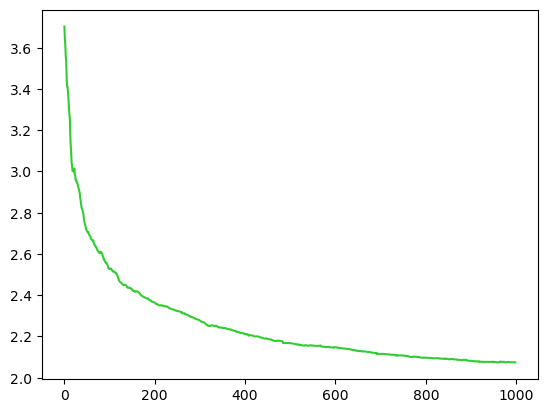

In [10]:
# Plot a graph to visualize the quantization errors
plt.plot(q_errors, color='limegreen')

In [11]:
# Set up the same som and retrain it
som = MiniSom(
    20, 20, 22, sigma=0.8,
    learning_rate=1, neighborhood_function='gaussian', random_seed=42)
som.train(customer_info_scaled, 1000)

In [12]:
# Check the winner node
som.winner(customer_info_scaled[0])

(7, 14)

In [13]:
# Assign the winning node for each row in customer_info_scaled using SOM
customer_info_final['winner_node'] = (
    [som.winner(customer_info_scaled[i]) for i in range(0, len(customer_info_scaled))])

In [14]:
# Group the data by the winner_node columnc calculate the size of each group, and sort the results in ascending order
customer_info_final.groupby('winner_node').size().sort_values()

winner_node
(5, 5)       1
(5, 19)      1
(3, 4)       1
(19, 4)      1
(15, 0)      1
          ... 
(5, 16)    555
(6, 2)     667
(7, 1)     691
(8, 1)     742
(9, 2)     786
Length: 321, dtype: int64

The neurons with the most data points associated are neurons: 
- (5,16)
- (6,2)
- (7,1)
- (8,1)
- (9,2)

In [15]:
# Extract unique values from the 'distinct_stores_visited' column in customer_info_final
stores_visited = list(customer_info_final.distinct_stores_visited.unique())
# Create a dictionary to assign unique colors to each store
stores_color = {store: 'C'+str(i+1) for i, store in enumerate(stores_visited)}

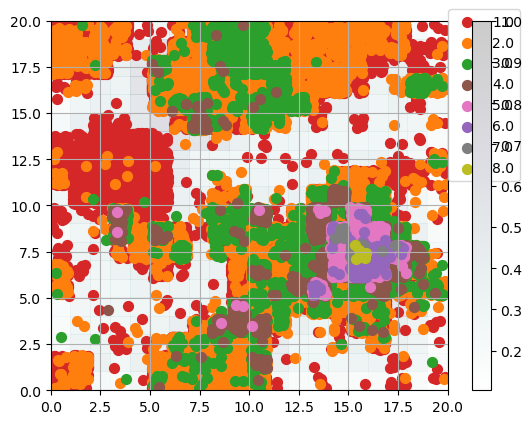

In [16]:
# Visualize the individual points in the grid
visualize_data_points_grid(
    customer_info_final, customer_info_scaled, som, 'distinct_stores_visited',stores_color)